## Plotting Graphs
Using the data from the file "Results\run2\arbitrary_h\program_data_h copy 2.csv"

    The simulators were run on a system with 512GB memory, 96 cores and 192 threads. 

In all the graphs, `h_prob` was kept at 0.1 which can be changed though the results are independent of h_prob.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### LBP Project Poster Graphs

Graph of Number of Qubits VS Wall Time (in log scale) for Qiskit Aer and DDSIM simulators.

H gate count was kept constant which can be changed from a range of 1 to 29.

Analysis: 
- Time increases exponentially with number of qubits.
- Time increases linearly for smaller number of qubits likely because of optimisations in the simulator for lower qubit count.

Keep in mind that Qiskit Aer uses multiple cores. 

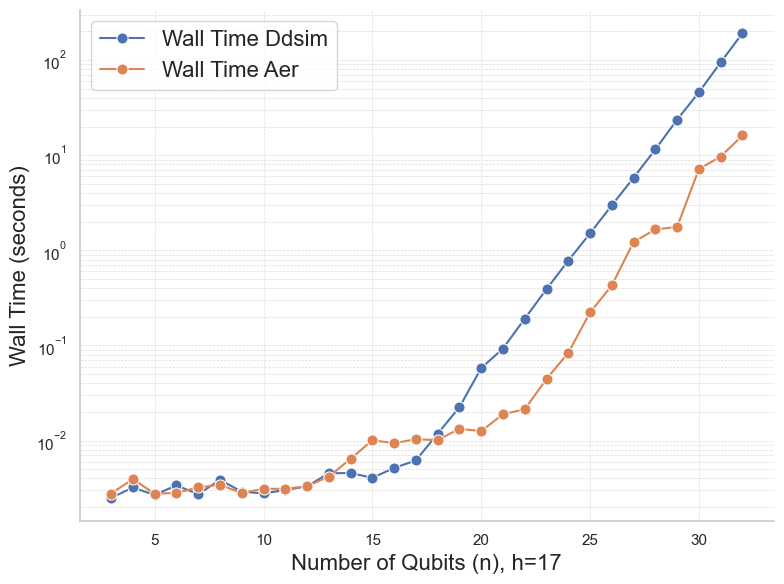

In [5]:
# Load data from CSV
data = pd.read_csv("Results/run2/arbitrary_h/program_data_h copy 2.csv")
data.columns = data.columns.str.strip()
# Set a beautiful Seaborn style
sns.set_theme(style="whitegrid")

for h in range(17, 18):
    # Filter rows where h = 17 and h_prob = 0.1
    filtered_df = data[(data["h"] == h) & (data["h_prob"] == 0.1)].copy()
    filtered_df = filtered_df.reset_index(drop=True)

    # Take the first 30 rows
    plot_data = filtered_df.head(30).copy()

    # Extract columns and ensure correct data types
    if not plot_data.empty:
        n = plot_data["n"].astype(int).values
        wall_time_ddsim = plot_data["wall_time_ddsim"].astype(float).values
        wall_time_aer = plot_data["wall_time_aer"].astype(float).values

        # Plotting with Seaborn
        plt.figure(figsize=(8, 6))

        sns.lineplot(x=n, y=wall_time_ddsim, marker='o', label='Wall Time Ddsim', markersize=8)
        sns.lineplot(x=n, y=wall_time_aer, marker='o', label='Wall Time Aer', markersize=8)

        # Enhance labels and title
        plt.xlabel(f"Number of Qubits (n), h={h}", fontsize=16)
        plt.ylabel("Wall Time (seconds)", fontsize=16)
        # plt.title(f"Wall Time vs Number of Qubits (n, h={h})", fontsize=28, fontweight='bold')

        # Improve the legend
        plt.legend(fontsize=16)

        # Keep the log scale for the y-axis
        plt.yscale("log")

        # Refine the grid
        plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

        # Add visual polish
        sns.despine()  # Remove top and right spines
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.savefig('your_plot.png', dpi=500)

    else:
        print(f"No data found for h={h} and h_prob=0.1.")

Graph of Number of H Gates VS Wall Time (in log scale) for Qiskit Aer and DDSIM simulators.

Qubit count was kept constant which can be changed from a range of 3 to 32.

Analysis: 
- Time increases linearly with number of H gates.
- This is because the number of gates also increases as H gates count increases.


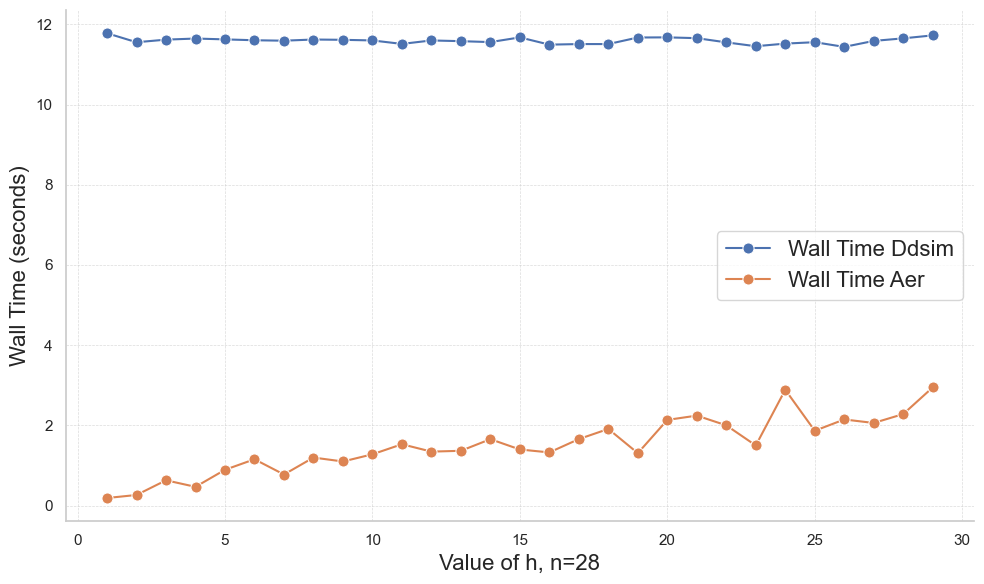

In [6]:
# Load data from CSV
data = pd.read_csv("Results/run2/arbitrary_h/program_data_h copy 2.csv")
data.columns = data.columns.str.strip()
# Set the same beautiful Seaborn theme
sns.set_theme(style="whitegrid")

for n_val in range(28, 29):
    # Filter rows where n = n_val and h_prob = 0.1
    filtered_df = data[(data["n"] == n_val) & (data["h_prob"] == 0.1)].copy()
    filtered_df = filtered_df.reset_index(drop=True)

    # Take the first 30 rows
    plot_data = filtered_df.head(30).copy()

    # Extract columns and ensure correct data types
    if not plot_data.empty:
        h = plot_data["h"].astype(int).values
        wall_time_ddsim = plot_data["wall_time_ddsim"].astype(float).values
        wall_time_aer = plot_data["wall_time_aer"].astype(float).values

        # Plotting with Seaborn
        plt.figure(figsize=(10, 6))

        sns.lineplot(x=h, y=wall_time_ddsim, marker='o', label='Wall Time Ddsim', markersize=8)
        sns.lineplot(x=h, y=wall_time_aer, marker='o', label='Wall Time Aer', markersize=8)

        # Enhance labels and title
        plt.xlabel(f"Value of h, n={n_val}", fontsize=16)
        plt.ylabel("Wall Time (seconds)", fontsize=16)
        # plt.title(f"Wall Time vs h (n={n_val})", fontsize=14, fontweight='bold')

        # Improve the legend
        plt.legend(fontsize=16, loc='center right')

        # Consider log scale if appropriate
        # plt.yscale("log")

        # Refine the grid
        plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

        # Add visual polish
        sns.despine()  # Remove top and right spines
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.savefig('your_plot.png', dpi=500)

    else:
        print(f"No data found for n={n_val} and h_prob=0.1.")

Graph of Number of Qubits VS Wall Time (in log scale) for Qiskit Aer, DDSIM simulators and PolyQ.

H gate count was kept constant. We chose two values of H gate count which can also be changed. 

Analysis: 
- Time increases exponentially with number of qubits for Aer and DDSIM simulators but remains almost contant for PolyQ.
- Time increases esponentially with number of H gate count for PolyQ


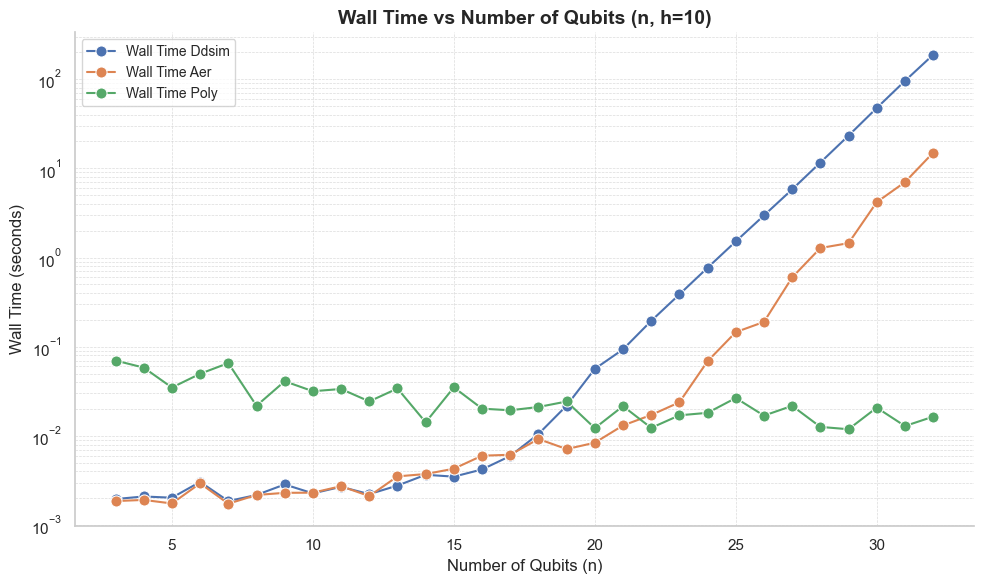

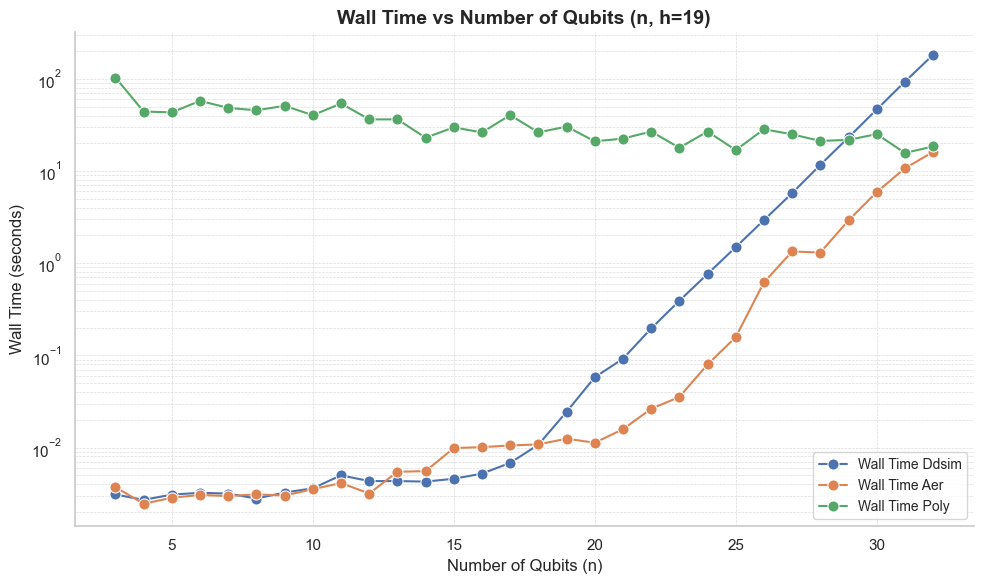

In [7]:
# Load data from CSV
data = pd.read_csv("Results/run2/arbitrary_h/program_data_h copy 2.csv")
data.columns = data.columns.str.strip()

# Set the same beautiful Seaborn theme
sns.set_theme(style="whitegrid")

for h_val in [10, 19]:
    # Filter rows where h = h_val and h_prob = 0.1
    filtered_df = data[(data["h"] == h_val) & (data["h_prob"] == 0.1)].copy()
    filtered_df = filtered_df.reset_index(drop=True)

    # Take the first 30 rows
    plot_data = filtered_df.head(30).copy()

    # Extract columns and ensure correct data types
    if not plot_data.empty:
        n = plot_data["n"].astype(int).values
        wall_time_ddsim = plot_data["wall_time_ddsim"].astype(float).values
        wall_time_aer = plot_data["wall_time_aer"].astype(float).values
        wall_time_poly = plot_data["wall_time_poly"].astype(float).values

        # Plotting with Seaborn
        plt.figure(figsize=(10, 6))

        sns.lineplot(x=n, y=wall_time_ddsim, marker='o', label='Wall Time Ddsim', markersize=8)
        sns.lineplot(x=n, y=wall_time_aer, marker='o', label='Wall Time Aer', markersize=8)
        sns.lineplot(x=n, y=wall_time_poly, marker='o', label='Wall Time Poly', markersize=8)

        # Enhance labels and title
        plt.xlabel("Number of Qubits (n)", fontsize=12)
        plt.ylabel("Wall Time (seconds)", fontsize=12)
        plt.title(f"Wall Time vs Number of Qubits (n, h={h_val})", fontsize=14, fontweight='bold')

        # Improve the legend
        plt.legend(fontsize=10)

        # Keep the log scale for the y-axis
        plt.yscale("log")

        # Refine the grid
        plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

        # Add visual polish
        sns.despine()  # Remove top and right spines
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.savefig(f'your_plot{h_val}.png', dpi=500)
        # plt.show()
    else:
        print(f"No data found for h={h_val} and h_prob=0.1.")

Extrapolating the above graphs

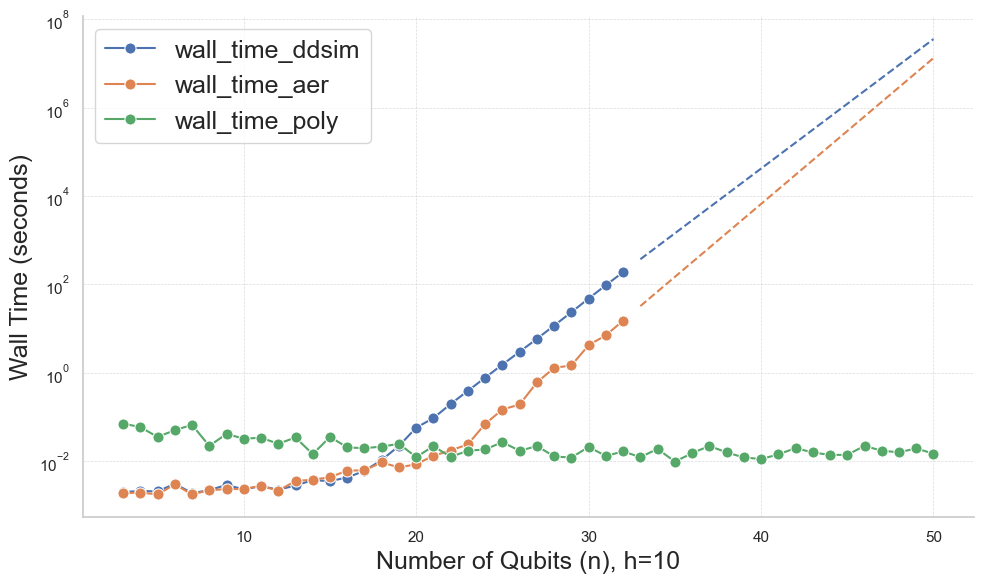

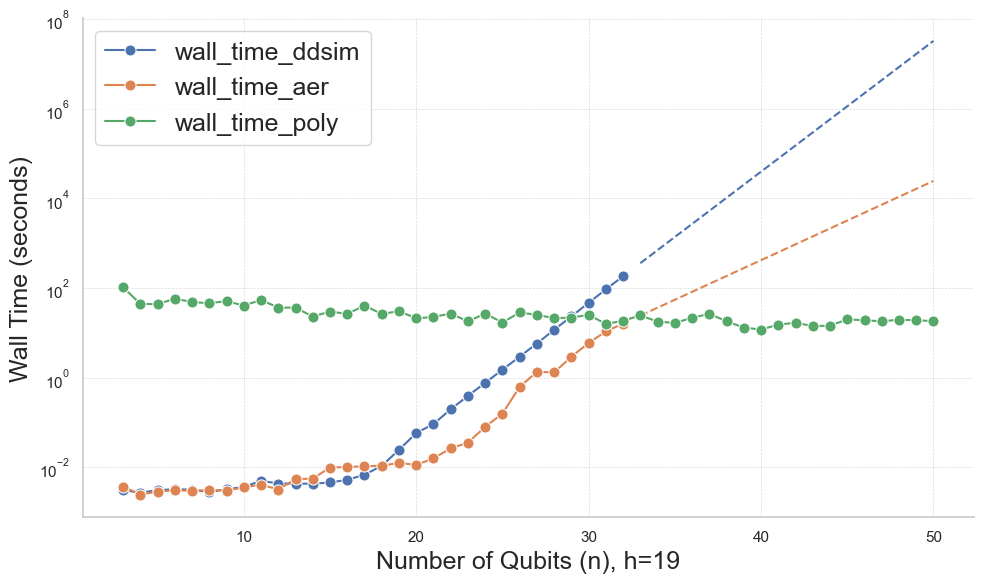

In [8]:
df = pd.read_csv("Results/run2/arbitrary_h/program_data_h copy 2.csv")
df.columns = df.columns.str.strip()

# Set the same beautiful Seaborn theme and color palette
sns.set_theme(style="whitegrid")
color_palette = sns.color_palette()
color_map = {"wall_time_ddsim": color_palette[0], "wall_time_aer": color_palette[1], "wall_time_poly": color_palette[2]}

for h in [10, 19]:
    # Filter data for h and h_prob
    filtered_df = df[(df["h_prob"] == 0.1) & (df["h"] == h)].reset_index(drop=True)
    n_vals = filtered_df["n"].values
    n_vals = n_vals[n_vals <= 50]
    filtered_df = filtered_df[filtered_df["n"].isin(n_vals)]

    sim_cols = ["wall_time_ddsim", "wall_time_aer"]  # Extrapolate only these

    plt.figure(figsize=(10, 6))

    for i, sim in enumerate(sim_cols):
        y_vals = filtered_df[sim].values
        valid_mask = y_vals != -1  # Mask to identify valid values (excluding -1)

        # Plot original values (with markers)
        sns.lineplot(x=n_vals[valid_mask], y=y_vals[valid_mask],
                     label=sim, marker="o", linestyle="-", color=color_map[sim], markersize=8)

        # Extrapolate from last two valid points in log scale if there's any -1
        if not np.all(valid_mask):
            idx = np.where(valid_mask)[0]
            if len(idx) >= 2:
                x1, x2 = n_vals[idx[-2]], n_vals[idx[-1]]
                y1, y2 = np.log(y_vals[idx[-2]]), np.log(y_vals[idx[-1]])  # Log scale for slope
                slope = (y2 - y1) / (x2 - x1)

                # n values where y == -1
                bad_mask = np.logical_not(valid_mask)
                bad_n = n_vals[bad_mask]

                # Extrapolated y values (back to original scale)
                extrapolated_log_y = y2 + slope * (bad_n - x2)
                extrapolated_y = np.exp(extrapolated_log_y)

                # Plot the extrapolated values (dashed lines with same color)
                plt.plot(bad_n, extrapolated_y, linestyle="--", color=color_map[sim])

    # Plot the third variable if it exists
    if "wall_time_poly" in filtered_df.columns:
        y_vals_poly = filtered_df["wall_time_poly"].values
        valid_mask_poly = y_vals_poly != -1
        sns.lineplot(x=n_vals[valid_mask_poly], y=y_vals_poly[valid_mask_poly],
                     label="wall_time_poly", marker="o", linestyle="-", color=color_map["wall_time_poly"], markersize=8)

    plt.yscale("log")
    plt.xlabel(f"Number of Qubits (n), h={h}", fontsize=18)
    plt.ylabel("Wall Time (seconds)", fontsize=18)
    # plt.title(f"Wall Time vs Number of Qubits (n, h = {h})", fontsize=28)
    plt.grid(True, which="both", axis="both", linestyle="--", linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.legend(fontsize=18)
    sns.despine()
    plt.savefig(f'your_plot{h}.png', dpi=500)


Graph of Number of H gates VS Wall Time (in log scale) for PolyQ.


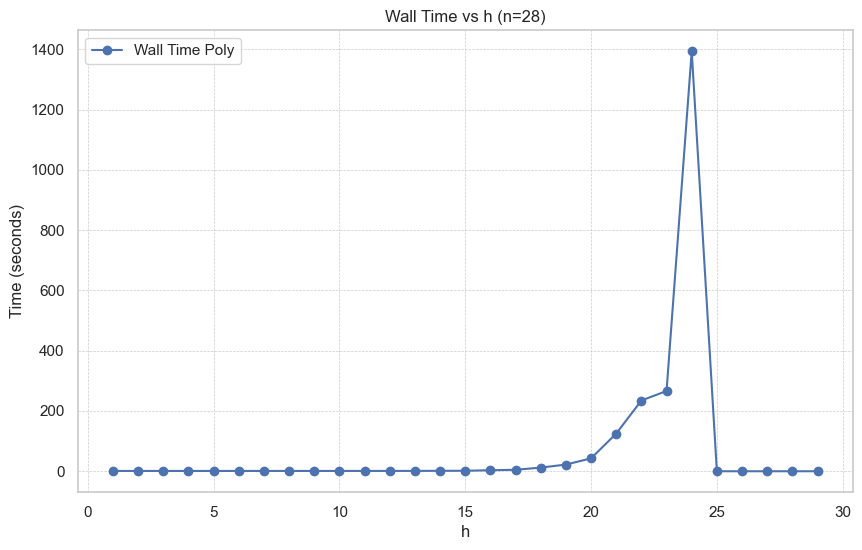

In [9]:
# Load data from CSV
data = pd.read_csv("Results/run2/arbitrary_h/program_data_h copy 2.csv")
data.columns = data.columns.str.strip()
for n in range(28, 29):
    # Filter rows where h = 16
    filtered_df = df[(df["n"] == n) & (df["h_prob"] == 0.1)]
    filtered_df = filtered_df.reset_index(drop=True)

    data = filtered_df.head(30)
    #print(data)

    # Extract columns and ensure correct data types
    h = data["h"].astype(int).values
    wall_time_poly = data["wall_time_poly"].astype(float).values
    wall_time_ddsim = data["wall_time_ddsim"].astype(float).values
    wall_time_aer = data["wall_time_aer"].astype(float).values

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(h, wall_time_poly, marker='o', linestyle='-', label='Wall Time Poly')
    #plt.plot(h, wall_time_ddsim, marker='.', linestyle='-', label='Wall Time Ddsim', markersize=5)
    #plt.plot(h, wall_time_aer, marker='.', linestyle='-', label='Wall Time Aer', markersize=5)

    plt.xlabel("h")
    plt.ylabel("Time (seconds)")
    plt.title(f"Wall Time vs h (n={n})")
    #plt.yscale("log")  # Log scale for better visualization
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()